In [2]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [1]:
!ls

'=1.8.0'   deepmedic   drive   sample_data


In [1]:
%cd drive
!ls

/content/drive
'My Drive'


In [2]:
%cd 'My Drive/BRATS2015'

/content/drive/My Drive/BRATS2015


In [3]:
!ls

data_visual_1.ipynb		testing    train.pkl
Final_data_preprocessing.ipynb	train.csv
License_CC_BY_NC_SA_3.0.txt	training


In [4]:
!pip install SimpleITK
import os
import re
import pandas as pd
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
reader = sitk.ImageFileReader()
reader.SetImageIO("MetaImageIO")

In [0]:
train_hgg = os.listdir("training/HGG")
train_lgg = os.listdir("training/LGG")

In [0]:
train_hg = {}
for i in train_hgg:
    train_hg[i] = "training/HGG/"+i+"/"+os.listdir("training/HGG/"+i)[1]

train_lg = {}
for i in train_lgg:
    train_lg[i] = "training/LGG/"+i+"/"+os.listdir("training/LGG/"+i)[1]

In [7]:
print(len(train_hg))
print(len(train_lg))

220
54


In [0]:
train_hg

In [0]:
train = [[0],[0]]
ii=0
for i in train_hg:
    inputImageFileName =  train_hg[i]
    reader.SetFileName(inputImageFileName)
    image = reader.Execute();
    nda = sitk.GetArrayFromImage(image)
    train[0].append(nda[10:146])
    train[1].append(0)
    ii=ii+1
    if(ii==100):
        break
ii=0
for i in train_lg:
    inputImageFileName =  train_lg[i]
    reader.SetFileName(inputImageFileName)
    image = reader.Execute();
    nda = sitk.GetArrayFromImage(image)
    train[0].append(nda[10:146])
    train[1].append(1)
    ii+=1
    if(ii==25):
        break

In [10]:
len(train[0])

126

In [0]:
df = pd.DataFrame(train)

In [0]:
df = (df.transpose()).drop(0,axis=0)

In [0]:
df = pd.get_dummies(df, columns=[1])

In [0]:
#df.head()

In [0]:
a = np.vstack(df[0].values.tolist()).reshape(125,136,240,240)

In [16]:
a.shape

(125, 136, 240, 240)

In [17]:
a[0][1].shape

(240, 240)

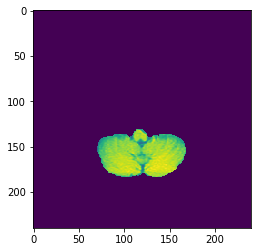

In [37]:
plt.imshow(a[11][1])
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(a, df.drop([0],axis=1), test_size = 0.2, random_state = 0)

In [20]:
print("x_train.shape ", x_train.shape)
print("y_train.shape ", y_train.shape)
print("x_test.shape ", x_test.shape)
print("y_test.shape ", y_test.shape)

x_train.shape  (100, 136, 240, 240)
y_train.shape  (100, 2)
x_test.shape  (25, 136, 240, 240)
y_test.shape  (25, 2)


In [0]:
y_test

In [0]:
y_train

In [23]:
import numpy
import keras
from keras import backend as K
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Dense, Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
import pandas as pd

Using TensorFlow backend.


In [0]:
batch_size = 32
num_classes = 2
epochs = 12
input_shape = x_train[0].shape

In [25]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

W0616 13:58:48.329190 140258460043136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0616 13:58:48.369479 140258460043136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0616 13:58:48.379106 140258460043136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0616 13:58:48.414928 140258460043136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0616 13:58:48.424639 

In [26]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

W0616 13:58:48.567726 140258460043136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0616 13:58:48.580798 140258460043136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 134, 238, 32)      69152     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 132, 236, 64)      18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 132, 236, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1993728)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                127598656 
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total para

In [31]:
model.fit(x_train, y_train,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
#score = model.evaluate(x_test, y_test, verbose=0)

Train on 100 samples, validate on 25 samples
Epoch 1/12
100/100 [==============================] - 6s 60ms/step - loss: 3.8683 - acc: 0.7600 - val_loss: 0.6447 - val_acc: 0.9600
Epoch 2/12
100/100 [==============================] - 6s 62ms/step - loss: 3.8683 - acc: 0.7600 - val_loss: 0.6447 - val_acc: 0.9600
Epoch 3/12
100/100 [==============================] - 6s 62ms/step - loss: 3.8683 - acc: 0.7600 - val_loss: 0.6447 - val_acc: 0.9600
Epoch 4/12
100/100 [==============================] - 6s 63ms/step - loss: 3.8683 - acc: 0.7600 - val_loss: 0.6447 - val_acc: 0.9600
Epoch 5/12
100/100 [==============================] - 6s 62ms/step - loss: 3.8683 - acc: 0.7600 - val_loss: 0.6447 - val_acc: 0.9600
Epoch 6/12
100/100 [==============================] - 6s 62ms/step - loss: 3.8683 - acc: 0.7600 - val_loss: 0.6447 - val_acc: 0.9600
Epoch 7/12
100/100 [==============================] - 6s 63ms/step - loss: 3.8683 - acc: 0.7600 - val_loss: 0.6447 - val_acc: 0.9600
Epoch 8/12
100/100 [====

In [30]:
score

[0.6447239518165588, 0.9599999785423279]